<a href="https://colab.research.google.com/github/WMinerva292/WMinerva292/blob/main/AIModule7AsgnmtLrngfrmPreBuiltModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Artificial Intelligence**

# **Module 7: Learning from Pre-Built Models - Assignment**

### **Problem Statement:**

The categorization of images into distinct classes is a pervasive task in computer vision, and it has a wide array of applications, including in pet identification and animal monitoring systems. In this assignment, we aim to develop a model capable of accurately distinguishing between cat and dog images. Instead of building a convolutional neural network (CNN) from scratch, we will leverage transfer learning using the VGG16 model, a pre-trained model on the ImageNet dataset. VGG16 is renowned for its effectiveness in image recognition tasks, but it does not have broad categories for cats and dogs. Therefore, we will utilize the convolutional (Conv) layers of VGG16 for feature extraction and add custom fully connected (Cat) layers for the classification task.

### **Objectives:**

**Utilize VGG16 for Feature Extraction:**

● Employ the VGG16 model, excluding its top layers, to serve as a feature
extractor for cat and dog images.

● Ensure the input images are of the correct size (150x150) and preprocessed
appropriately to match VGG16’s requirements.

**Data Preprocessing and Augmentation:**

Implement image data generators for real-time data augmentation, ensuring a
robust and varied dataset for training the classification layers.

**Build and Train the Classification Model:**

● Add custom fully connected layers on top of the VGG16 model for the
classification task.

● Freeze the convolutional layers of VGG16 to retain the pre-trained features
and only train the added classification layers.

**Model Compilation and Training:**

● Compile the model using stochastic gradient descent, categorical
cross-entropy as the loss function, and accuracy as the evaluation metric.

● Train the model using the training data, and validate its performance using
a validation set.

**Evaluate and Test the Model:**

● Assess the model’s performance based on its accuracy in classifying
images into cat or dog categories.

● Implement a prediction function to classify new images, providing the
predicted category and the associated confidence level.

### **Python Codes:**

In [ ]:
# Step 1: Install necessary packages
!pip install tensorflow scikit-learn

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
import shutil
import zipfile

# Step 2: Define the dataset URL
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# Download the dataset
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=url, extract=False)

# Define base directory where the dataset should be extracted
base_dir = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

# Extract manually if not already extracted
if not os.path.exists(base_dir):
    with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
        zip_ref.extractall(os.path.dirname(path_to_zip))

# Verify extraction
print("Base Directory Exists:", os.path.exists(base_dir))
print("Contents of Base Directory:", os.listdir(base_dir) if os.path.exists(base_dir) else "Not found")

# Step 3: Define Paths for Dataset
original_train_dir = os.path.join(base_dir, 'train')
original_val_dir = os.path.join(base_dir, 'validation')

# Define new directories
train_dir = os.path.join(base_dir, 'train_split')
val_dir = os.path.join(base_dir, 'val_split')
test_dir = os.path.join(base_dir, 'test_split')

# Create new directories if they don't exist
for directory in [train_dir, val_dir, test_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Create train and val subdirectories for each category
for category in ['cats', 'dogs']:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)

# Step 4: Split the data
for category in ['cats', 'dogs']:
    original_train_path = os.path.join(original_train_dir, category)
    original_val_path = os.path.join(original_val_dir, category)

    # Copy to new train dir
    for file in os.listdir(original_train_path):
        src = os.path.join(original_train_path, file)
        dst = os.path.join(train_dir, category, file)
        shutil.copy(src, dst)

    # Copy to new val dir
    for file in os.listdir(original_val_path):
        src = os.path.join(original_val_path, file)
        dst = os.path.join(val_dir, category, file)
        shutil.copy(src, dst)

# Step 5: Image Preprocessing and Augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Image Size and Batch Size
img_size = (150, 150)
batch_size = 32

# Load Data
train_generator = data_gen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = data_gen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Base Directory Exists: True
Contents of Base Directory: ['train', 'validation', 'vectorize.py']
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Step 6: Load Pre-trained VGG16 Model (Exclude Top Layers)
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Step 7: Freeze Pre-trained Layers
for layer in vgg16_base.layers:
    layer.trainable = False


In [ ]:
# Step 8: Custom Fully Connected Layers
model = Sequential([
    vgg16_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

In [ ]:
# Step 9: Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Step 10: Train Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 785s 12s/step - accuracy: 0.5945 - loss: 0.7121 - val_accuracy: 0.8190 - val_loss: 0.4377
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 797s 13s/step - accuracy: 0.7921 - loss: 0.4547 - val_accuracy: 0.8070 - val_loss: 0.4064
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 782s 12s/step - accuracy: 0.8281 - loss: 0.3842 - val_accuracy: 0.8170 - val_loss: 0.3805
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 782s 12s/step - accuracy: 0.8234 - loss: 0.3770 - val_accuracy: 0.8220 - val_loss: 0.3950
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 783s 12s/step - accuracy: 0.8388 - loss: 0.3565 - val_accuracy: 0.8470 - val_loss: 0.3553
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 782s 12s/step - accuracy: 0.8449 - loss: 0.3474 - val_accuracy: 0.8580 - val_loss: 0.3230
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 783s 12s/step - accuracy: 0.8480 - loss: 0.3374 - val_accuracy: 0.8420 - val_loss: 0.3401
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 784s 13s/step - accuracy: 0.8670 - loss: 0.3160 - val_accuracy: 0.

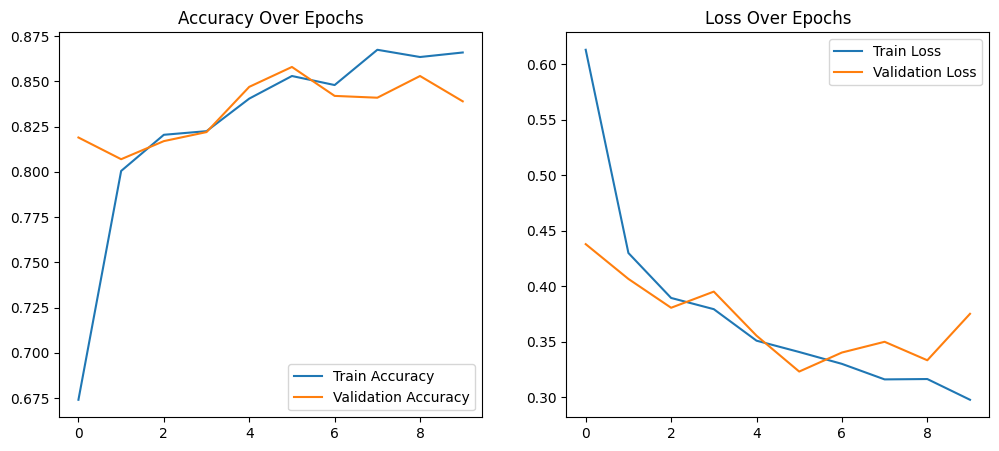

In [ ]:
# Step 11: Plot Training Performance
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy Over Epochs')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss Over Epochs')
    plt.show()

plot_training_history(history)

In [ ]:
# Step 12: Function for Image Prediction
def predict_image(image_path, model):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(image_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)[0][0]
    class_label = 'Dog' if prediction > 0.5 else 'Cat'
    confidence = prediction if prediction > 0.5 else 1 - prediction
    print(f"Prediction: {class_label} ({confidence:.2f} confidence)")
    return class_label

In [ ]:
# Example Prediction
# predict_image('path_to_test_image.jpg', model)
